# Interpolation and fitting a polynomial to data

The following data are taken from T. A. Boden, G. Marland, R. J. Andres, "Global, regional, and national fossil-fuel CO₂ emissions". Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tennessee, U.S.A., 2017, doi:10.3334/CDIAC/00001_V2017.

- [CDIAC: Global fossil fuel CO₂ emissions](https://cdiac.ess-dive.lbl.gov/trends/emis/tre_glob_2014.html)

These provide estimates of global CO₂ emissions from 2004 to 2014 inclusive, in millions of tons of carbon.

| Year | Emissions |
|------|------|
| 2004 | 7743 |
| 2005 | 8042 |
| 2006 | 8336 |
| 2007 | 8503 |
| 2008 | 8776 |
| 2009 | 8697 |
| 2010 | 9128 |
| 2011 | 9503 |
| 2012 | 9673 |
| 2013 | 9773 |
| 2014 | 9855 |

Below I create 4 plots visualising and interpreting the data:

1. A scatter plot of the original data with an interpolating polynomial fitting through the data.
2. A degree five least squares fitting polynomial, fitting the data in a least squares sense as described in the week 6 lecture and workshops.
3. A cubic spline through the data generated using `scipy.interpolate.CubicSpline` provided with SciPy.
4. A cubic spline through the data generated using `scipy.interpolate.PchipInterpolator` provided with SciPy.

<IPython.core.display.Javascript object>


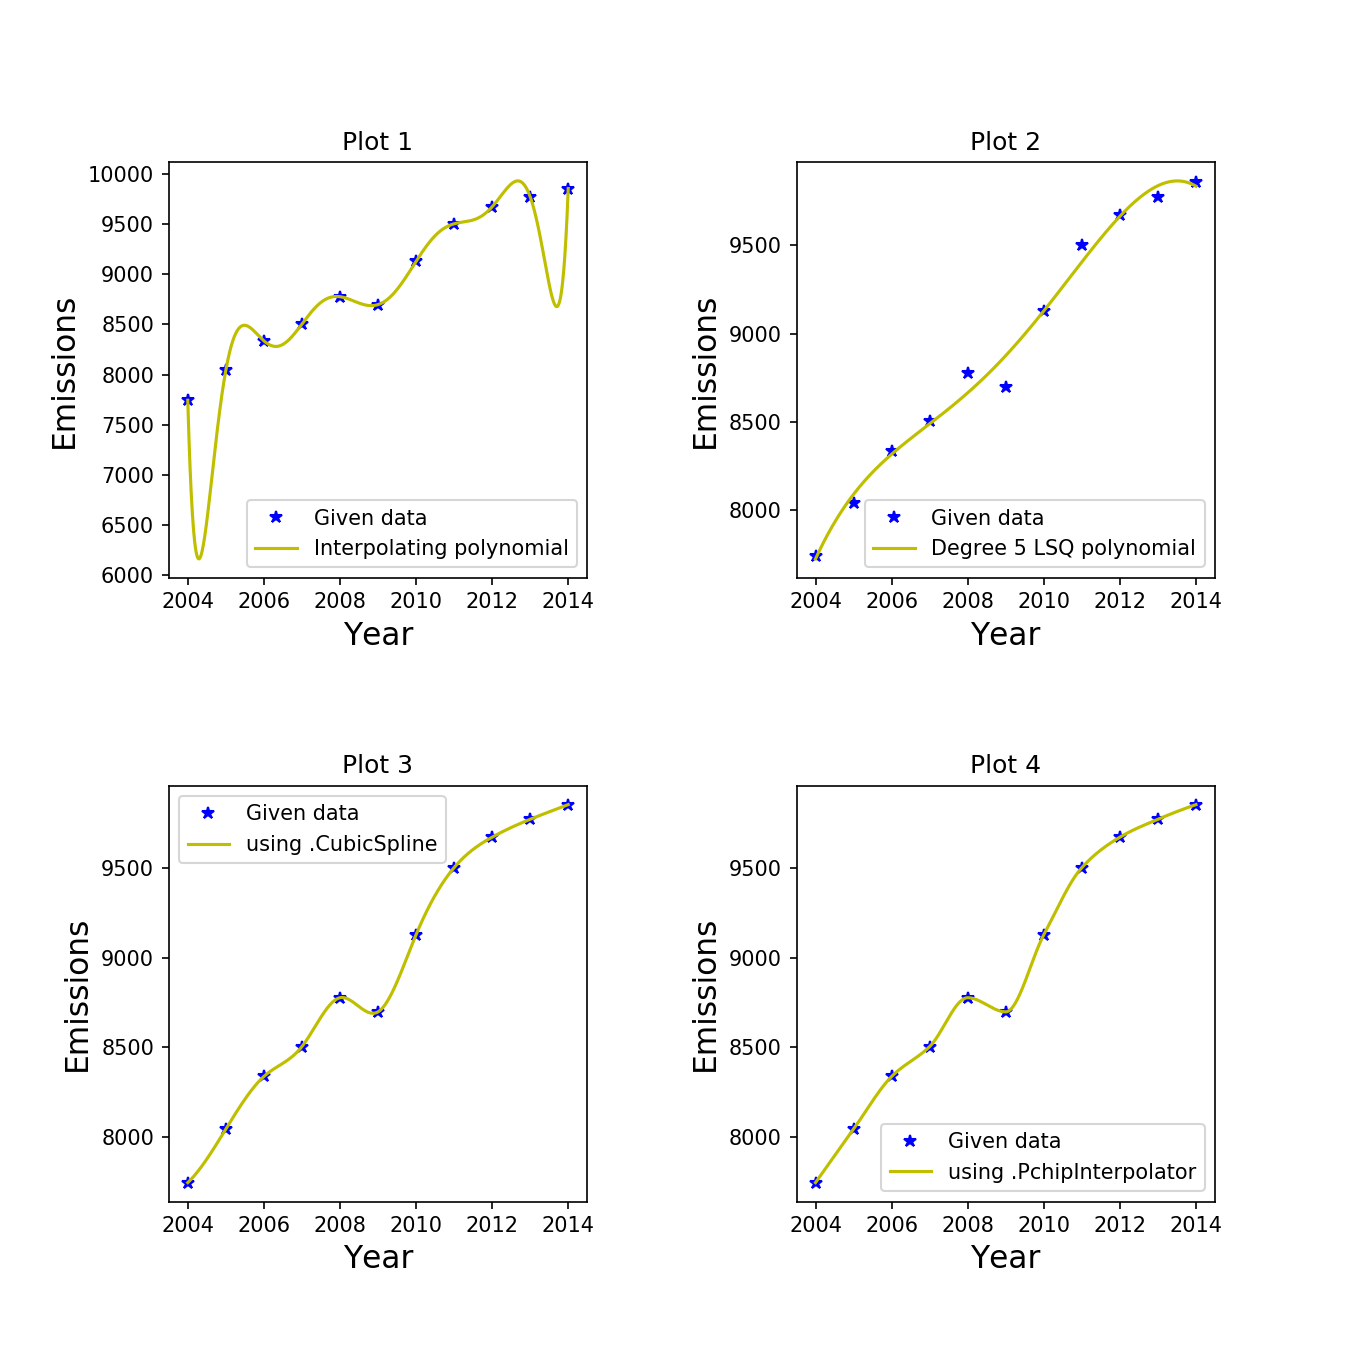

In [4]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import interpolate

fig, ax = plt.subplots(2, 2)                      #creating subplots to make comparing the different plots easier
fig.set_size_inches(9, 9)                         #setting size of each subplot
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)   #setting spacing between each subplot

#1.1)Creating a scatter plot of the original data----------------------------------------------------------------

plt.sca(ax[0,0])                                  #setting top left as the current subplot
plt.xlabel("Year", fontsize=15)                   #labelling axes
plt.ylabel("Emissions", fontsize=15)              
x=np.linspace(2004,2014,11)                       #storing given data
y=np.array([7743,8042,8336,8503,8776,8697,9128,9503,9673,9773,9855])
plt.plot(x,y,"b*", label = "Given data")          #plotting a scatter graph

#1.2)Creating an interpolating polynomial fitting through the data-----------------------------------------------

x_plot = np.linspace(2004, 2014, 1000)            #defining input for the polynomial
x_scaled = (x - np.mean(x)) / np.std(x)           #scaling to reduce error
x_plot_scaled = (x_plot - np.mean(x)) / np.std(x)
p10 = np.polyfit(x_scaled, y, 10)                 #creating a degree 10 least square polynomial, as there are 11 data points
p_plot = np.polyval(p10, x_plot_scaled)           #producing output of the polynomial
                                                  #plotting the interpolating polynomial
plt.plot(x_plot,p_plot,"y-", label = "Interpolating polynomial")
plt.title("Plot 1")                               #adding a title
plt.legend()                                      #adding a graph key/legend

#2)Creating a degree 5 least square fitting polynomial-----------------------------------------------------------

plt.sca(ax[0,1])                                  #setting top right as the current subplot
p5 = np.polyfit(x_scaled, y, 5)                   #creating a degree 5 least square polynomial, using scaled values
p_plot = np.polyval(p5, x_plot_scaled)            #producing output of the polynomial
plt.xlabel("Year", fontsize=15)                   #labelling axes
plt.ylabel("Emissions", fontsize=15)
plt.plot(x,y,"b*", label = "Given data")          #plotting a scatter graph of given data points
                                                  #plotting the degree 5 polynomial
plt.plot(x_plot,p_plot,"y-",label = "Degree 5 LSQ polynomial")
plt.title("Plot 2")                               #adding a title
plt.legend()                                      #adding a graph key/legend

#4)Creating a cubic spline using .CubicSpline--------------------------------------------------------------------

plt.sca(ax[1,0])                                  #setting bottom left as the current subplot
f = interpolate.CubicSpline(x, y)                 #creating the cubic spline polynomial
plt.xlabel("Year", fontsize=15)                   #labelling axes
plt.ylabel("Emissions", fontsize=15)
plt.plot(x,y,"b*", label = "Given data")          #plotting a scatter graph of given data points
                                                  #plotting the cubic spline polynomial
plt.plot(x_plot, f(x_plot), "y-", label = "using .CubicSpline")
plt.title("Plot 3")                               #adding a title
plt.legend()                                      #adding a graph key/legend

#5)Creating a cubic spline using .PchipInterpolator--------------------------------------------------------------

plt.sca(ax[1,1])                                  #setting bottom right as the current subplot
f = interpolate.PchipInterpolator(x, y)           #creating the PchipInterpolator polynomial
plt.xlabel("Year", fontsize=15)                   #labelling axes
plt.ylabel("Emissions", fontsize=15)
plt.plot(x,y,"b*", label = "Given data")          #plotting a scatter graph of given data points
                                                  #plotting PchipInterpolator polynomial
plt.plot(x_plot, f(x_plot), "y-", label = "using .PchipInterpolator")
plt.title("Plot 4")                               #adding a title
plt.legend()                                      #adding a graph key/legend
plt.show()
